## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
items=pd.read_csv("./data/items.csv")
shops=pd.read_csv("./data/shops.csv")
cats=pd.read_csv("./data/item_categories.csv")
train=pd.read_csv("./data/sales_train.csv")

test=pd.read_csv("./data/test.csv")

In [3]:
 items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


- items.head()
    - item_name / item_id / item_category_id
- cats.head()
    - item_category_name / item_category_id
- shops.head()
    - shop_name / shop_id
- test.head()
    - shop_id / item_id

### shape , null 등 확인

In [10]:
df_list=[items, shops, cats, train, test]
for i in df_list:
    print('---shape---')
    print(i.shape)
    print()
    print('---null---')
    print(i.isnull().sum())
    print('---null---')
    print(i.info())
    print('-' * 50)

---shape---
(22170, 3)

---null---
item_name           0
item_id             0
item_category_id    0
dtype: int64
---null---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB
None
--------------------------------------------------
---shape---
(60, 2)

---null---
shop_name    0
shop_id      0
dtype: int64
---null---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
------------------------------

In [12]:
## 중복값 확인
for i in df_list:
    print('-' * 22)
    print(sum(i.duplicated()))
    print()

----------------------
0

----------------------
0

----------------------
0

----------------------
6

----------------------
0



In [14]:
train[train.duplicated()==True]

train.drop_duplicates(inplace= True)

## EDA

### 이상치 제거

<AxesSubplot:xlabel='item_price'>

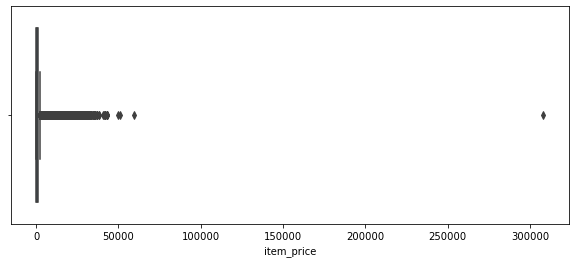

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_price)

<AxesSubplot:xlabel='item_cnt_day'>

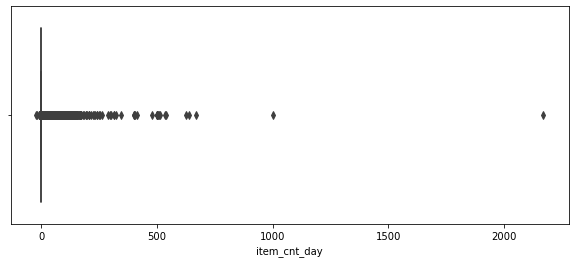

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(x=train.item_cnt_day)

In [17]:
train=train[train.item_price<100000]
train=train[train.item_cnt_day<1000]

train=train[train.item_cnt_day>=0]

### shops

In [18]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [22]:
shops['city']=shops.shop_name.str.split(' ').map(lambda x: x[0])

In [23]:
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [24]:
from sklearn.preprocessing import LabelEncoder

ld=LabelEncoder()
ld.fit(list(shops['city'].values))
shops['city']=ld.transform(list(shops['city'].values))

In [25]:
shops.drop(['shop_name'], axis=1, inplace=True)

### cats

In [26]:
cats.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [27]:
cats['split']=cats['item_category_name'].str.split('-')
cats['type']=cats['split'].map(lambda x: x[0].strip())
cats.head()

,item_category_name,item_category_id,split,type
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары


In [32]:
ld=LabelEncoder()
ld.fit(list(cats['type'].values))
cats['type_code']=ld.transform(list(cats['type'].values))
cats.head()

,item_category_name,item_category_id,split,type,type_code
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC,0
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары,1
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары,1
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары,1
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары,1


In [33]:
cats['subtype']=cats['split'].map(lambda x: x[1].strip() if len(x)>1 else x[0].strip())

lb=LabelEncoder()
lb.fit(list(cats['subtype'].values))
cats['subtype_code']=lb.transform(list(cats['subtype'].values))
cats.head()

,item_category_name,item_category_id,split,type,type_code,subtype,subtype_code
0,PC - Гарнитуры/Наушники,0,"[PC , Гарнитуры/Наушники]",PC,0,Гарнитуры/Наушники,29
1,Аксессуары - PS2,1,"[Аксессуары , PS2]",Аксессуары,1,PS2,9
2,Аксессуары - PS3,2,"[Аксессуары , PS3]",Аксессуары,1,PS3,10
3,Аксессуары - PS4,3,"[Аксессуары , PS4]",Аксессуары,1,PS4,11
4,Аксессуары - PSP,4,"[Аксессуары , PSP]",Аксессуары,1,PSP,13


In [34]:
cats=cats[['item_category_id','type_code','subtype_code']]
cats.head()

,item_category_id,type_code,subtype_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13


### items

In [35]:
items.drop(['item_name'], axis=1, inplace=True)
len(test.shop_id.unique())

42

In [36]:
len(list(set(test.item_id)))

5100

In [37]:
len(test)

214200

In [39]:
len(set(test.item_id)-set(train.item_id))

'''
test에는 있는데 train에는 없는 363개의 item_id가 있으므로 이 데이터 들에 대해서는 0개사 판매
된걸로 예측해야한다. 월별 판매량을 계산하고 해당 월의 고유 한 쌍마다 매출을 0으로 늘려야 할 거 같다.
'''

363

In [40]:
len(train.date_block_num.value_counts())

34

In [41]:
from itertools import product
matrix=[]
cols=['date_block_num','shop_id','item_id']

for i in range(34):
    sales=train[train.date_block_num==i]
    matrix.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), 
                           dtype='int16'))
matrix=pd.DataFrame(np.vstack(matrix),columns=cols)
matrix['date_block_num']=matrix['date_block_num'].astype(np.int8)
matrix['shop_id']=matrix['shop_id'].astype(np.int8)
matrix['item_id']=matrix['item_id'].astype(np.int16)
matrix.sort_values(cols, inplace=True)

matrix.head(3)

,date_block_num,shop_id,item_id
139168,0,0,19
141406,0,0,27
144881,0,0,28


In [42]:
sales=train[train.date_block_num==1]
sales.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
115690,21.02.2013,1,50,3880,1499.0,1.0
115691,14.02.2013,1,50,3880,1499.0,1.0
115692,21.02.2013,1,50,4128,899.0,1.0


In [43]:
sales.shop_id.unique()

array([50, 47, 51, 52, 42, 46, 43, 54, 56, 59,  7, 53, 16, 18, 19, 14, 15,
       13, 23, 24, 21, 25, 22,  4,  3,  5,  1,  2,  6,  0,  8, 12, 10, 31,
       32, 35, 44, 41, 45, 37, 38, 26, 27, 29, 30, 28], dtype=int64)

In [44]:
import itertools
list(itertools.product([1], sales.shop_id.unique(), sales.item_id.unique()))

[(1, 50, 3880),
 (1, 50, 4128),
 (1, 50, 4124),
 (1, 50, 3879),
 (1, 50, 3885),
 (1, 50, 3950),
 (1, 50, 4163),
 (1, 50, 3897),
 (1, 50, 3941),
 (1, 50, 3959),
 (1, 50, 4036),
 (1, 50, 3983),
 (1, 50, 3993),
 (1, 50, 4127),
 (1, 50, 3890),
 (1, 50, 4115),
 (1, 50, 3878),
 (1, 50, 3834),
 (1, 50, 3850),
 (1, 50, 3851),
 (1, 50, 3788),
 (1, 50, 3805),
 (1, 50, 3869),
 (1, 50, 3870),
 (1, 50, 3871),
 (1, 50, 4164),
 (1, 50, 4244),
 (1, 50, 4245),
 (1, 50, 4248),
 (1, 50, 4249),
 (1, 50, 4251),
 (1, 50, 4266),
 (1, 50, 4092),
 (1, 50, 4282),
 (1, 50, 4241),
 (1, 50, 4227),
 (1, 50, 4240),
 (1, 50, 3508),
 (1, 50, 3328),
 (1, 50, 3321),
 (1, 50, 3322),
 (1, 50, 3360),
 (1, 50, 3362),
 (1, 50, 3366),
 (1, 50, 3367),
 (1, 50, 3320),
 (1, 50, 3325),
 (1, 50, 3326),
 (1, 50, 3327),
 (1, 50, 3476),
 (1, 50, 3702),
 (1, 50, 3705),
 (1, 50, 3718),
 (1, 50, 3698),
 (1, 50, 3719),
 (1, 50, 3743),
 (1, 50, 3745),
 (1, 50, 3622),
 (1, 50, 3624),
 (1, 50, 3693),
 (1, 50, 3490),
 (1, 50, 3371),
 (1, 50,

In [45]:
train['revenue']=train['item_price']*train['item_cnt_day']
#가격과 판매된 제품 수를 곱해서  revenue 피처를 만들었다.

In [47]:
group=train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_day': ['sum']})
group.columns=['item_cnt_month']
group.reset_index(inplace=True)

matrix=pd.merge(matrix, group, on=cols, how='left')
matrix['item_cnt_month']=(matrix['item_cnt_month'].fillna(0)
                         .clip(0,20)
                         .astype(np.float16))

matrix.head(3)

'''
date_block_num, shop_id, item_id이 세 피처에 대해서 그룹바이 한다음에 월별 합계를 위해서 agg함수
를 사용하였으며 범위를 0부터 20으로 바꾸고 타입을 float16으로 바꿉니다. matrix에 월별 판매량을 
merge 시켰다.
'''

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0


In [48]:
test['date_block_num']=34
test['date_block_num']=test['date_block_num'].astype(np.int8)
test['shop_id']=test['shop_id'].astype(np.int8)
test['item_id']=test['item_id'].astype(np.int16)
test.head(3)

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34


In [49]:
matrix=pd.concat([matrix, test], ignore_index=True, sort=False, keys=cols)
matrix.fillna(0,inplace=True)
matrix.head(3)

#matrix에 test를 합치기

,date_block_num,shop_id,item_id,item_cnt_month,ID
0,0,0,19,0.0,0.0
1,0,0,27,0.0,0.0
2,0,0,28,0.0,0.0


In [ ]:
matrix=pd.merge(matrix, shops, on=['shop_id'],how='left')
matrix=pd.merge(matrix, items, on=['item_id'],how='left')
matrix=pd.merge(matrix, cats, on=['item_category_id'],how='left')